In [1]:
%cd 'C:\Users\Rolex James\Documents\MOOCs\ML Univ of Washington\Classification\Resources\machine-learning-specialization-master\course-3'

C:\Users\Rolex James\Documents\MOOCs\ML Univ of Washington\Classification\Resources\machine-learning-specialization-master\course-3


In [2]:
#import needed libraries
import numpy as np
import graphlab as gl #The data is in sframe format
import sklearn.tree

In [3]:
#Load the dataset
loans = gl.SFrame('lending-club-data.gl/')

This non-commercial license of GraphLab Create is assigned to tolurotimibabalola@gmail.com and will expire on December 29, 2016. For commercial licensing options, visit https://dato.com/buy/.


2016-06-10 10:20:14,515 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.9 started. Logging: C:\Users\ROLEXJ~1\AppData\Local\Temp\graphlab_server_1465550403.log.0


In [4]:
print loans.shape

(122607, 68)


In [5]:
#Recode the 'bad_loans' column in a more intuitive way
loans['safe_loans'] = loans['bad_loans'].apply(lambda x: +1 if x==0 else -1)
loans.remove_column('bad_loans')

id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade
1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2
1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4
1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5
1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1
1075269,1311441,5000,5000,5000,36 months,7.9,156.46,A,A4
1072053,1288686,3000,3000,3000,36 months,18.64,109.43,E,E1
1071795,1306957,5600,5600,5600,60 months,21.28,152.39,F,F2
1071570,1306721,5375,5375,5350,60 months,12.69,121.45,B,B5
1070078,1305201,6500,6500,6500,60 months,14.65,153.45,C,C3
1069908,1305008,12000,12000,12000,36 months,12.69,402.54,B,B5


In [6]:
#proportion of safe loans and risky loans
print "Percentage of safe loans: ", np.sum(np.array(loans['safe_loans'] == +1)) /float(len(loans))
print "Percentage of risky loans: ", np.sum(np.array(loans['safe_loans'] == -1)) /float(len(loans))

Percentage of safe loans:  0.811185331996
Percentage of risky loans:  0.188814668004


In [7]:
#Extract subset of features from the dataset 
features = ['grade', # grade of the loan
'sub_grade', # sub-grade of the loan
'short_emp', # one year or less of employment
'emp_length_num', # number of years of employment
'home_ownership', # home_ownership status: own, mortgage or rent
'dti', # debt to income ratio
'purpose', # the purpose of the loan
'term', # the term of the loan
'last_delinq_none', # has borrower had a delinquincy
'last_major_derog_none', # has borrower had 90 day or worse rating
'revol_util', # percent of available credit being used
'total_rec_late_fee', # total late fees received to day
]

target = 'safe_loans' # prediction target (y) (+1 means safe, -1 is risky)
# Extract the feature columns and target column
loans = loans[features + [target]]

Because the number of safe loans far outweight the risky loans, we will downsample the majority class so that the data will have about the same number of safe and risky loans

In [8]:
safe_loans_raw = loans[loans[target] == +1]
risky_loans_raw = loans[loans[target] == -1]

print "Number of safe loans : %s" % len(safe_loans_raw)
print "Number of risky loans : %s" % len(risky_loans_raw)

Number of safe loans : 99457
Number of risky loans : 23150


In [9]:
# Since there are fewer risky loans than safe loans, find the ratio of the sizes
# and use that percentage to undersample the safe loans.
percentage = len(risky_loans_raw)/float(len(safe_loans_raw))
risky_loans = risky_loans_raw

#Sample this percentage from the safe_loans data
#setting seed for reproducibility
safe_loans = safe_loans_raw.sample(percentage, seed=1)
# Append the risky_loans with the downsampled version of safe_loans
loans_data = risky_loans.append(safe_loans)

In [10]:
#Check the proportion of safe and risky loans to ensure they are about the same
#proportion of safe loans and risky loans
print "Number of safe loans: ", np.sum(np.array(loans_data['safe_loans'] == +1)) /float(len(loans_data))
print "Number of risky loans: ", np.sum(np.array(loans_data['safe_loans'] == -1)) /float(len(loans_data))

Number of safe loans:  0.502236174422
Number of risky loans:  0.497763825578


scikit-learn's implementation of decision tree requires numerical values for the data matrix. This means we have to turn categorical variables to numeric via one-hot encoding.

In [11]:
#Function to perform one-hot encoding for categorical variables
categorical_variables = []
for feat_name, feat_type in zip(loans_data.column_names(), loans_data.column_types()):
    if feat_type == str:
        categorical_variables.append(feat_name)
for feature in categorical_variables:
    loans_data_one_hot_encoded = loans_data[feature].apply(lambda x: {x: 1})
    loans_data_unpacked = loans_data_one_hot_encoded.unpack(column_name_prefix=feature)
    # Change None's to 0's
    for column in loans_data_unpacked.column_names():
        loans_data_unpacked[column] = loans_data_unpacked[column].fillna(0)
    
    loans_data.remove_column(feature)
    loans_data.add_columns(loans_data_unpacked)

In [12]:
#Split data into train and test data
train_data, test_data = loans_data.random_split(.8, seed = 1)

The final step is to convert these SFrames to numpy arrays

In [13]:
featuresList = loans_data.column_names()
#Remove target column 'safe_loans' from featuresList
featuresList.remove('safe_loans')

In [14]:
#Index using our features list to create the training and test sets
pred_train = train_data[featuresList]
pred_test = test_data[featuresList]
#Do the same for the target column 
target_train = train_data['safe_loans']
target_test = test_data['safe_loans']

In [15]:
#Convert them to numpy arrays
pred_train = pred_train.to_numpy()
pred_test = pred_test.to_numpy()
target_train = target_train.to_numpy()
target_test = target_test.to_numpy()

Let's train a decision tree classifier with max_depth = 2

In [16]:
treeClassifier = sklearn.tree.DecisionTreeClassifier(max_depth=2)
#Fit classifier on the training data
decision_tree_model = treeClassifier.fit(pred_train, target_train)

### Visualizing the tree

In [17]:
#Displaying the decision tree
from io import BytesIO as StringIO
from IPython.display import Image

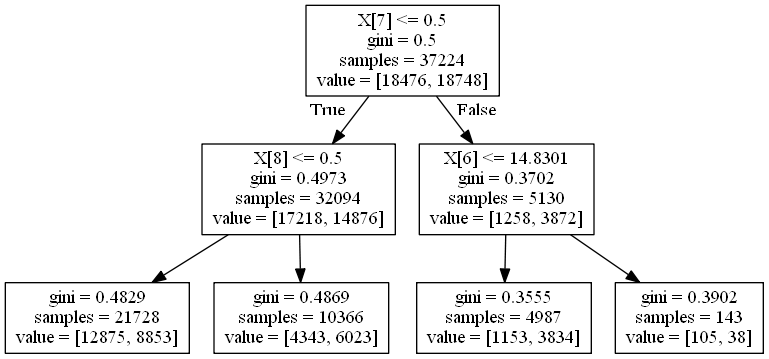

In [18]:
out = StringIO()
sklearn.tree.export_graphviz(decision_tree_model, out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

In [23]:
#Get column names for data set
featuresList[6]

'total_rec_late_fee'

In [22]:
import pandas as pd
pd.value_counts(target_train)

 1    18748
-1    18476
dtype: int64

### Evaluating accuracy of tree on test data

In [19]:
#the score function gives us the accuracy of the decision tree model
print "Accuracy of decision tree on test data: %.3f" % decision_tree_model.score(pred_test, target_test)

Accuracy of decision tree on test data: 0.619


In [20]:
print safe_loans_raw['purpose'][0:10]

['credit_card', 'small_business', 'other', 'wedding', 'car', 'debt_consolidation', 'debt_consolidation', 'credit_card', 'debt_consolidation', 'home_improvement']


### Let's try ensemble methods

In [21]:
#First we will try a gradient boosted tree classifier, 5 means we are running 5 iterations
model_5 = gl.boosted_trees_classifier.create(train_data, validation_set=None, features=features,
          target=target, max_iterations = 5)

ToolkitError: The following columns were expected but are missing: ['grade', 'home_ownership', 'term', 'purpose', 'sub_grade']